# Exemplo 3 - Aula 1 

Classificação com Support Vector Machine (SVC - classifier), utilizando dados de altura e peso de peixes para classificá-los como obesos ou não. 

Os dados são divididos em dados de treino e de teste, e é utilizada uma matriz de confusão para avaliar o modelo.

In [1]:
# Importando bibliotecas necessárias para trabalhar com os dados e utilizar o modelo de ML
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix
import numpy as np
####

# Importando biblioteca e montando google drive, para ter acesso ao arquivo de dados
from google.colab import drive
drive.mount('/content/gdrive')
# Leitura do arquivo csv que contém os dados, armazenados no Google Drive
gdrive_path = '/content/gdrive/My Drive/Data Science/Python/2021-22 PUCRS Pós/Disciplina 3 Python para CD/Prof Mauricio SOFTPLAN/Arquivos/'
fish_obesity_df = pd.read_csv(gdrive_path+'fish obesity.csv')

Mounted at /content/gdrive


In [2]:
fish_obesity_df.head(10)

,Height,Weight,Obese
0,174,96,1
1,189,87,0
2,185,110,1
3,195,104,0
4,149,61,0
5,189,104,0
6,147,92,1
7,154,111,1
8,174,90,0
9,169,103,1


In [3]:
# selecionando a coluna 'obese' como labels
labels = fish_obesity_df['Obese']
labels[:10]

0    1
1    0
2    1
3    0
4    0
5    0
6    1
7    1
8    0
9    1
Name: Obese, dtype: int64

In [4]:
# selecionando colunas de peso e altura como features
features = []
for i in range(len(fish_obesity_df['Weight'])):
  features.append([fish_obesity_df['Weight'][i], fish_obesity_df['Height'][i]])
features[:10]

[[96, 174],
 [87, 189],
 [110, 185],
 [104, 195],
 [61, 149],
 [104, 189],
 [92, 147],
 [111, 154],
 [90, 174],
 [103, 169]]

In [5]:
# DIVIDINDO ENTRE DADOS DE TREINO E DE TESTES 
X_train, X_test, y_train, y_test = train_test_split(features, labels, train_size=0.8, random_state=42)

In [6]:
X_train[:10]

[[68, 177],
 [72, 161],
 [74, 156],
 [127, 186],
 [141, 188],
 [105, 165],
 [131, 173],
 [59, 180],
 [99, 188],
 [99, 188]]

In [7]:
X_test[:10]

[[103, 152],
 [65, 195],
 [132, 154],
 [76, 185],
 [101, 146],
 [111, 172],
 [70, 187],
 [160, 145],
 [112, 154],
 [62, 191]]

In [8]:
y_train[:10]

46     0
93     0
335    1
412    1
471    1
237    1
544    1
470    0
511    0
361    0
Name: Obese, dtype: int64

In [9]:
y_test[:10]

316    1
77     0
360    1
90     0
493    1
209    1
176    0
249    1
516    1
426    0
Name: Obese, dtype: int64

In [10]:
# Criando a Support Vector Machine Classifier e fazendo seu ajuste com os dados de treino
obesity_clf_svm = svm.SVC()
obesity_clf_svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

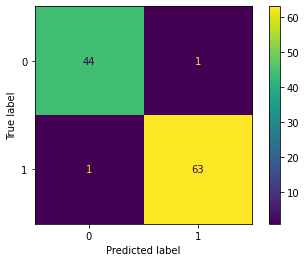

In [11]:
# Verificando acurácia do modelo nos dados de teste com uso de Matriz de Confusão
plot_confusion_matrix(obesity_clf_svm, X_test, y_test)  
